# Solution to Cosmotools

# Brief Introduction

Let me, as a remainder, write down the master equation of structure formation that has to be solved in order to study the Large Scale Structure (LSS) of the Universe. This is the so called Vlasov's equation:

\begin{equation}
\begin{aligned}
\frac{\partial n}{\partial \tau} + \frac{\vec{p}}{ma}\cdot \nabla n - am\nabla\Phi\cdot\frac{\partial n}{\partial \vec{p}} = 0 \, .
\end{aligned}
\label{eq:vlasov}
\end{equation}

This equation is a non-linear partial differential equation involving seven variables. Therefore, exact solutions are far from our reach except in very specific cases.

## Linear solutions

One way of obtaining approximated solutions to the matter distribution of the previous equation is to assume that both the density of matter and the velocity field can be expanded perturbatively. This is, in general, true when the value of the overdensity field, $\delta$, and the divergence velocity field, $\nabla \theta$, are smaller than 1. Inthis case, we can write the equation for structure formation:

\begin{equation}
\begin{aligned}
\ddot{\delta}+2H\dot{\delta}-4\pi G\bar{\rho}\delta = 0 \, ,
\label{eq:overdens_evol}
\end{aligned}
\end{equation}

which is the differential equation of a spring-damper system. This equation has analytical solutions that we can compute and that I will not write here. The point I wanted to make with this is just that, given some initial conditions for $\delta(x,t)$, we can follow their evolution analytically. Moreover, since the standard model assumes that the Initial conditions are given by a Gaussian random field, and this equation does not couple densities of different scales, The evolution does not change the Gaussian nature of the field and all of the information is captured in the 2-point statistics. This is why we focus on analyzing the 2-point statistics as defined by the correlation function,

\begin{equation}
\xi(r) = \langle \delta(\vec{x}) \delta(\vec{x}+r) \rangle \, .
\label{eq:corr_funct}
\end{equation}

However, since scales are independent, a nice way of making this independency aparent is to study this in Fourier space and use the power spectrum $P(k)$ instead,

\begin{equation}
\langle \delta^{*}_k\delta_{k^{\prime}} \rangle = \frac{1}{V} \delta_{\rm{D}}(\vec{k}-\vec{k}^{\prime})\int d^3r \xi(\vec{r}) e^{-i\vec{k}\cdot\vec{r}} \equiv \frac{1}{V}\delta_{\rm{D}}(\vec{k}-\vec{k}^{\prime})P(\vec{k}) \, ,
\label{eq:PowSpec}
\end{equation}

## Non-linear solutions

In order to fully solve the Vlasov equation, numerical approaches are required. It is true that there are different ways of making analytical predictions to approximate full solutions such as getting to higher orders in perturbation theory. However, in the end, they cannot push to the small scales probed by cosmological surveys. That's why we will be using in this exercise full numerical solutions as given by N-body simulations. Concretely, those given by cosmological emulators as explained in:

https://bacco.dipc.org/emulator.html

Note that, once the evolution couples different scales, the matter field does not remain a Gaussian random field, and the 2-point statistic does not completely define the field. Studies over higher point statistics (3-point, 4-point, etc) are usually done, but those are beyond the scope of this lecture.

# Excersice

In this excersice we will study the cosmological information content at different scales of the 2-point statistics of the galaxy distribution. For a more detailed description of the excersice, read the "Excersice description". Here I will only scetch the problem without much detail and will provide with solutions.

## Data

To start we need some realistic data with cosmological information. For this I have chosen the power spectrum of mock data created using the SHAMe technique. The choice of the power spectrum is an obvious one, since most of the cosmological surveys use it to constrain cosmology. On the other hand the choice of using mock data provided by SHAMe instead of public data was a bit more complicated. I finally decided to use mock data because it is not affected by systematic observational effects that one has to take into account when comparing models with data. Accounting for this is not within the goals of this exercise and I chose to use mock data. In any case, SHAMe has been shown to reproduce all of the relevant physics of hydrodynamic simulations and therefore, it is a very good approximation to what real data would look like without observational systematics. The output of the SHAMe mock that we will use are the positions and velocities of realistic galaxies.

Let's have a look at the data. These represent the summary statistics of LSS surveyed data for a survey very similar to BOSS. Concretely I provided the multipoles of the power spectrum: monopole, quadrupole, and hexadecapole. We will use only the monopole in this lecture, but if you are advanced and want to try including the extra multipoles, feel free to do so. What we are going to do is first open the file, store the content in numpy arrays and plot its content to familiarise with the monopole shape. The data is ordered in columns as: k, P0, err_P0, P2, err_P2, P4, err_P4. But, as stated, we will only use the first three columns here.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


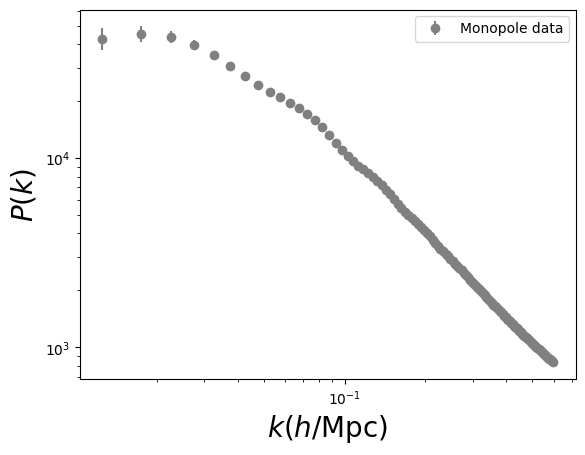

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

data = np.loadtxt('/content/drive/MyDrive/SummerSchool/Day_9/data_winterschool.txt').T
k = data[0]
mono_data = data[1]
err = data[2]

plt.errorbar(k, mono_data, err, fmt='o', color='grey', label=r'Monopole data')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k(h/$Mpc)', size=20)
plt.ylabel(r'$P(k)$', size=20)
plt.legend()
plt.show()

## Linear Model

Now we define the first model that we will be using today, the linear model. As we saw, this model can be solved "analytically" given some Hubble function $H(t)$. Of course, getting solutions is way more complicated in practice and one needs to solve the Boltzmann equation for different species. Two very well known codes that do this are CAMB and CLASS. Even though they are very fast in their computations, for getting the results we seek, it would take a time that we do not have. That's why we will make use of the bacco emulator. The only thing this emulator does is interpolate between the predictions computed with the previous codes. For this, it uses a neural network that makes predictions extremely fast. For any application, this is like using CLASS or CAMB, but faster.

Let's see how to call the model and plot it. First, we load the model, then we define some cosmology providing cosmological parameters and then we call the model. Finally, we plot how it looks like. Note that the cosmology that is given in params is the one I used to create the data.

In [4]:
!pip install baccoemu
import baccoemu as baccoemu

emulator = baccoemu.Matter_powerspectrum()

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


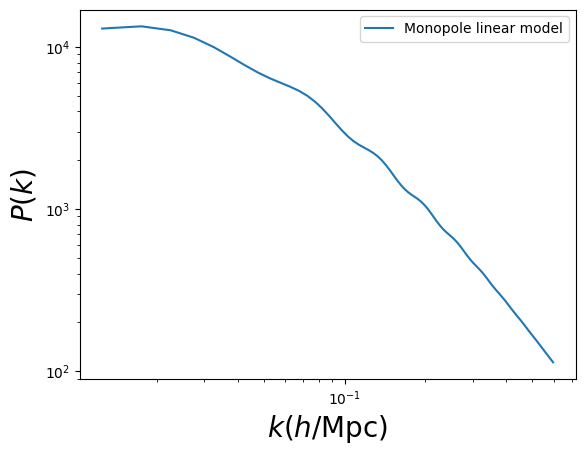

In [5]:
#Set cosmological parameters
params = {
    'omega_cold'    :  0.307,
    'sigma8_cold'   :  0.8, # if A_s is not specified
    'omega_baryon'  :  0.048252,
    'ns'            :  0.9611,
    'hubble'        :  0.6777,
    'neutrino_mass' :  0.0,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  0.6355
}

#Call the model
k, pk_cold_lin = emulator.get_linear_pk(k=k, cold=True, **params)

#Plot the model
plt.plot(k, pk_cold_lin, label=r'Monopole linear model')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k(h/$Mpc)', size=20)
plt.ylabel(r'$P(k)$', size=20)
plt.legend()
plt.show()

## Nonlinear Model

As already discussed, full solutions to structure formation in the Universe can only be achieved through numerical simulations. This is what we will use here as the nonlinear model, solutions to the power spectrum through N-body simulations. Now, running an N-body simulation at the volumes we need for the data provided, takes an insane amount of CPU time. Therefore, we will use the BACCO emulator once again. This was trained over a set of 4000 N-body like simulations to give their power spectrum in a matter of microseconds.

Let's see how does this model looks like. Since we already loaded the emulator and defined the cosmological parameters, we just need to call the nonlinear model.

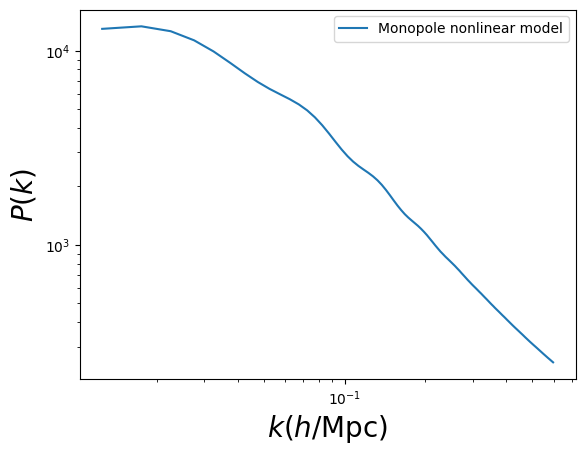

In [6]:
#Call the model
k, pk_cold_nonlin = emulator.get_nonlinear_pk(k=k, cold=True, **params)

#Plot the model
plt.plot(k, pk_cold_nonlin, label=r'Monopole nonlinear model')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k(h/$Mpc)', size=20)
plt.ylabel(r'$P(k)$', size=20)
plt.legend()
plt.show()

Now we can compare the predictions for the matter distribution of these two models

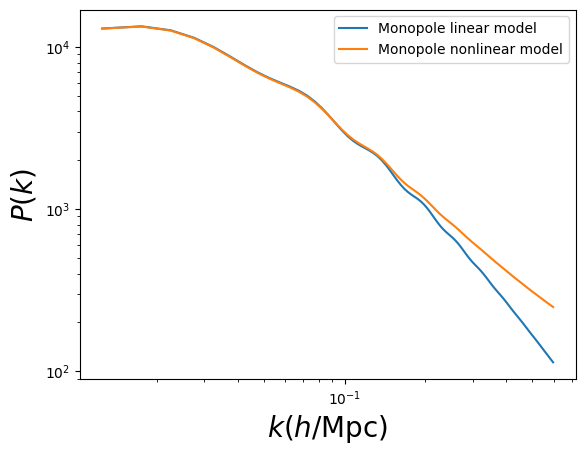

In [7]:
plt.plot(k, pk_cold_lin, label=r'Monopole linear model')
plt.plot(k, pk_cold_nonlin, label=r'Monopole nonlinear model')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k(h/$Mpc)', size=20)
plt.ylabel(r'$P(k)$', size=20)
plt.legend()
plt.show()

We see that in the large scales ($k<0.1$), where $\delta<1$, both models agree well. It is on the small scales, where the coupling between scales due to gravitational collapse is larger, that the differences are enhanced.

## 1) Model comparison

Now we are going to compare the models to the monopole data. Naively, the first thing I would do is simply plot one vs the other to see the similarities and differences. So let's do that!

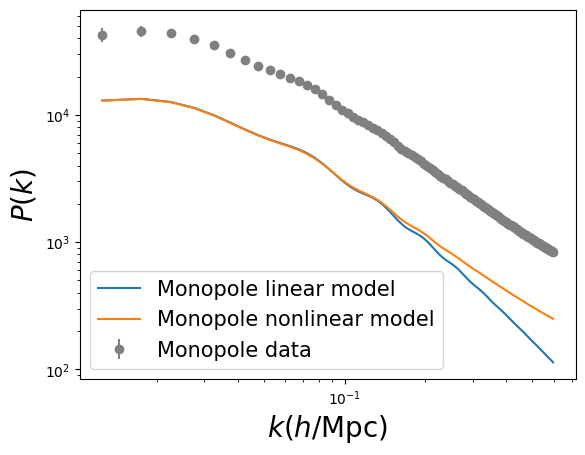

In [8]:
plt.errorbar(k, mono_data, err, fmt='o', color='grey', label=r'Monopole data')
plt.plot(k, pk_cold_lin, label=r'Monopole linear model')
plt.plot(k, pk_cold_nonlin, label=r'Monopole nonlinear model')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k(h/$Mpc)', size=20)
plt.ylabel(r'$P(k)$', size=20)
plt.legend(fontsize=15)
plt.show()

Oooook, so the models and the data are quite far from each other. Why is this happening? We did not take into account two main effects here.

First, we should acknowledge that not all of the matter content of the Universe is in the form of galaxies. We assume that the galaxies follow the gravitational potential of the matter content, but a great portion of it is in the form of Dark Matter, which does not account for galaxy matter. Thus, galaxies are biased tracers of the total matter content. We are going to acknowledge this through a bias model. In a naive way, we can model this with a constant bias $b$ so that the field that we are actually measuring is $\delta_{\rm{tr}}=b\delta_{m}$, where $\delta_{\rm{tr}}$ is the overdensity field of the tracers, $\delta_m$ is the dark matter field and $b$ is the so called "linear" bias (although a better name would be large scale bias). Moreover, from the definition of power spectrum

\begin{equation}
P_{\rm{tr}}(k)=b^2P_m(k) \, ,
\label{eq:lin_bias}
\end{equation}

which tell us that the amplitude of the power spectrum is higher for the tracers than for the underlying dark matter.

Second is the effect of Redshift Space Distortions. Since what we meassured are redshifts and not positions, our meassurements are affected by the Doppler effect caused by the velocities of the objects. This Doppler effect can be modelled as the Kaiser factor leading to:

\begin{equation}\label{eq:kaiser_factor1}
P^s(\vec{k}) = {\left[1+f\mu_k^2 \right]}^2 P(k) \,.
\end{equation}

This is a 2D quantity, since it depends on $k$ and $\mu$. Once we translate this into Legendre multipoles, the monopole looks like:

\begin{equation}\label{eq:Fourier_mono}
P_{g,\ell=0}^s(k) =  \left[ 1 + \frac{2}{3}\beta + \frac{1}{5} \beta^2 \right] b^2 P(k) \, ,
\end{equation}

Note that all of these results are only valid in the linear approximation. We won't include nonlinear corrections to these two effects here but be aware that these are required when studying small scales.

Let's then include these effects with some free parameters into our models and find the values that make the models fit.

## 1.1) Find the parameters $b$ and $\beta$ such that the model fits reasonably well the data

### Answer:

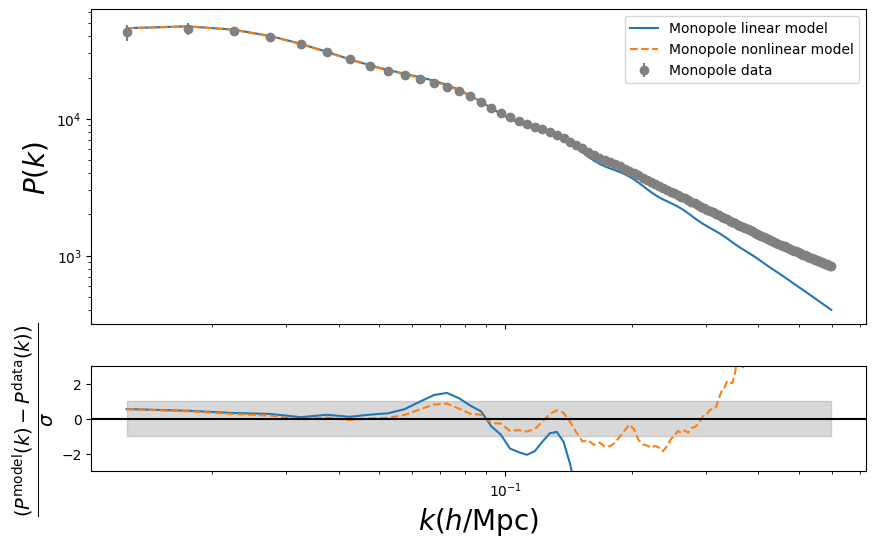

In [13]:
b = 1.6
beta = 0.5

model_lin = (1+2/3*beta+1/5*beta**2)*b**2*pk_cold_lin
model_nonlin = (1+2/3*beta+1/5*beta**2)*b**2*pk_cold_nonlin

fig, ax = plt.subplots(2,1, figsize=(10,6),sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ax[0].errorbar(k, mono_data, err, fmt='o', color='grey', label=r'Monopole data')
ax[0].plot(k, model_lin, label=r'Monopole linear model')
ax[0].plot(k, model_nonlin, ls='--', label=r'Monopole nonlinear model')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].legend()
ax[1].plot(k, (model_lin-mono_data)/err)
ax[1].plot(k, (model_nonlin-mono_data)/err, ls='--')
ax[1].fill_between(k,-np.ones(len(mono_data)),np.ones(len(mono_data)), alpha=0.3, color='grey')
ax[1].axhline(0, color='k')
ax[1].set_xscale('log')
ax[1].set_ylim(-3.,3.)
ax[1].set_xlabel(r'$k(h/$Mpc)', size=20)
ax[0].set_ylabel(r'$P(k)$', size=20)
ax[1].set_ylabel(r'$\frac{(P^{\rm model}(k)-P^{\rm data}(k))}{\sigma}$', size=20)
plt.show()

## 1.2) Just out of this little experiment, what would you say the maximum fitting mode $k_{\rm{max}}$ is for each of the models. Is one of them clearly better than the other?

### Answer:

# 2) Parameter constraints with the linear model

We have now some data, and two models that can fit these data down to some given scale $k_{\rm{max}}$, even though we don't know the exact scale. We are going to find out this scale and, on the way, we will explorte the cosmological constraining power of each model. Let's first focus on constraining the cosmology. For this, we are going to run a Markov Chain Monte Carlo (MCMC). We will be using the python package emcee. To make your life easier, let me define a couple of functions that you can use to run emcee in a simpler way, and show you how to run a simple emcee example.

### emcee usage

First, some useful functions to use emcee:

In [15]:
!pip install emcee
import emcee

class mcmc_res:
    def __init__(self, sampler, x0=None):
        self.sampler = sampler
        self.flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
        self.x = []
        self.x_low = []
        self.x_high = []
        self.ndim = self.flat_samples.shape[1]
        for i in range(self.ndim):
            mcmc = np.percentile(self.flat_samples[:, i], [16, 50, 84])
            q = np.diff(mcmc)
            self.x.append(mcmc[1])
            self.x_low.append(q[0])
            self.x_high.append(q[1])
        self.x0 = x0
        self.nonmarg_bestfit = sampler.flatchain[np.argmin(sampler.flatlnprobability)]
def run_mcmc(func_chi2, x0=None, bounds=None, nstep=5000, args=()):
    assert x0 is not None, 'please, provide a first guess of the parameter values'
    assert bounds is not None, 'please, provide the boundaries of the parameter hyperspace'
    def log_prior(theta, bounds):
        theta_l = list(theta)
        for i, pp in enumerate(theta_l):
            if (pp < bounds[i][0]) | (pp > bounds[i][1]):
                return -np.inf
        return 0
    def log_likelihood(theta, *args):
        return -1 * func_chi2(theta, *args)
    def log_probability(theta, *args):
        lp = log_prior(theta, bounds)
        if not np.isfinite(lp):
            return -np.inf
        return lp + log_likelihood(theta, *args)
    import emcee
    ndim = len(x0)
    nwalkers = 4 * ndim
    pos = x0 + 1e-4 * np.random.randn(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=args)
    sampler.run_mcmc(pos, nstep, progress=True)
    result = mcmc_res(sampler, x0=x0)
    return result

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.9 MB/s eta 0:00:00


Now, we define the data and the model. We will use a very simple example where we have a polynomial model to fit data that we drew from the same model.

\begin{equation}
Data = 1+2x+3x^2
\end{equation}
\begin{equation}
Model = a+bx+cx^2
\end{equation}

Thus, the model is perfect for this data.

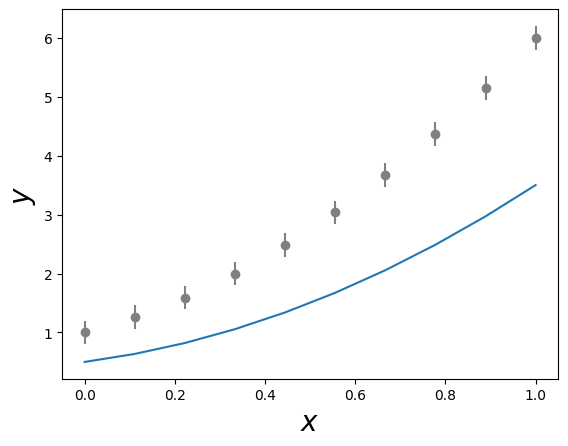

In [16]:
x_eg = np.linspace(0,1,10)
data_eg = 1+2*x_eg+3*x_eg**2
err_eg = 0.2*np.ones(len(x_eg))

def compute_model(free_params, x=None):
    #Set parameters
    a = free_params[0]
    b = free_params[1]
    c = free_params[2]
    #Compute theory :
    model = a+b*x+c*x**2
    return model

params = np.array([0.5, 1, 2])

model_eg = compute_model(params, x=x_eg)

plt.errorbar(x_eg, data_eg, err_eg, fmt='o', color='grey')
plt.plot(x_eg, model_eg)
plt.xlabel('$x$', size=20)
plt.ylabel('$y$', size=20)
plt.show()

Next step is to define a function that returns the $\chi^2$ term comparing model and data for a given set of free parameters $\{a,b,c\}$. A better explanation of the $\chi^2$ can be found in the next section (I wanted to keep this example simple and compact). Then we use this $\chi^2$ as an input to the functions of emcee and define the arguments emcee will need to compute the posterior statistics.

In [17]:
def compute_chi2(free_params, x=None, data=None, err=None):
    #Compute model
    model = compute_model(free_params, x=x)
    #chi2 computation
    chi2=np.sum((data-model)**2/err**2)
    return 0.5*chi2

ndim = 3
nwalkers = 4
nstep = 1000

bounds_eg = [[0., 5.], [0, 5], [0, 5.]]
x0_eg = [1., 1., 1.]
args_eg = (x_eg, data_eg, err_eg)
result_eg = run_mcmc(compute_chi2, x0=x0_eg, bounds=bounds_eg, args=args_eg, nstep=nstep)


100%|██████████| 1000/1000 [00:00<00:00, 1404.12it/s]


Now we plot the bestfit (actually the marginalised statistics but whatever) of the chain.

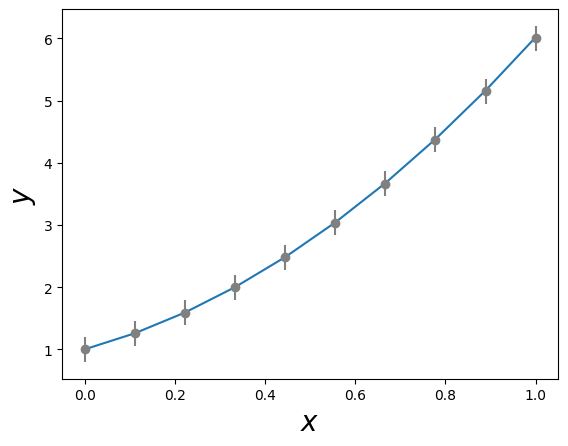

In [18]:
bestfit = result_eg.x

model_eg = compute_model(bestfit, x=x_eg)

plt.errorbar(x_eg, data_eg, err_eg, fmt='o', color='grey')
plt.plot(x_eg, model_eg)
plt.xlabel('$x$', size=20)
plt.ylabel('$y$', size=20)
plt.show()

Now we plot the posterior distributions with python corner plot package.

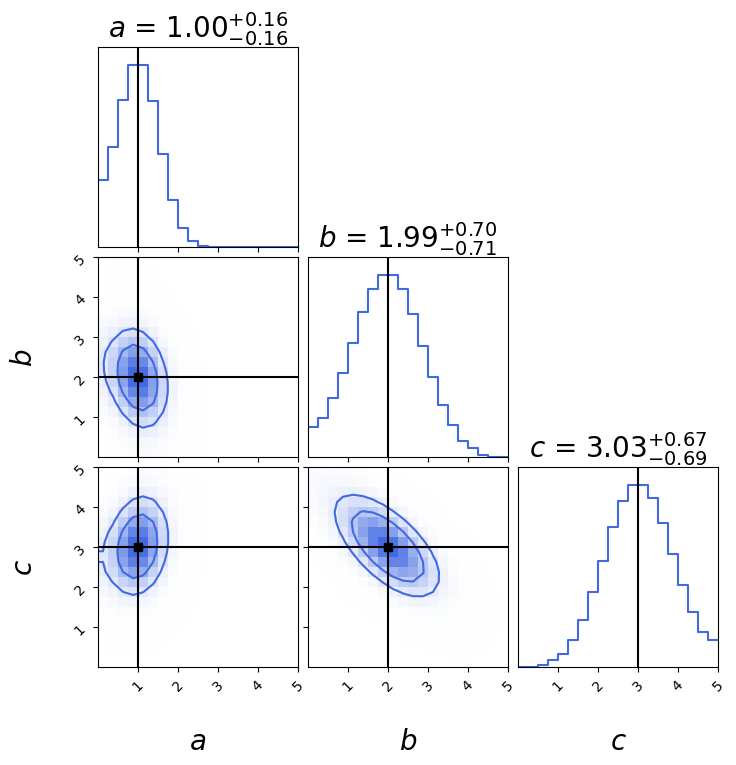

In [20]:
!pip install corner
import corner

labels = [r'$a$', r'$b$', r'$c$']
truths = [1,2,3]

figure = corner.corner(
            result_eg.flat_samples, labels=labels, title_kwargs={"fontsize": 20},
            label_kwargs={"fontsize": 20}, smooth=2, smooth1d=2,
            range=bounds_eg,truths=truths, color='royalblue',
            levels=(0.39,0.68), plot_datapoints=False, truth_color='k', show_titles=True
        )

### Back to our case

Now that we know how to use emcee to extract parameter information, the next step is to write down a function to get the $\chi^2$ of a given data, model, and data variance. Remember that the $\chi^2$ is defined in relation to the gaussian likelihood function $\mathcal{L}\propto\exp(-\chi^2/2)$:

\begin{equation}
 \chi^2 = (\mathcal{X}_i-\mathcal{X}_{i,\mathrm{theo}})^{\rm{T}}M_{ij} (\mathcal{X}_j-\mathcal{X}_{j,\mathrm{theo}}) \, .
 \label{eq:likelihood}
\end{equation}

Here $^{\rm T}$ denotes the transpose, $\mathcal{X}$ are the data taken, $\mathcal{X}_\mathrm{theo}$ are the theoretical predictions depending on the cosmology and $M=C^{-1}$ is the inverse of the covariance matrix, defined as the matrix whose element in the $i$, $j$ position is a measure of the joint probability of two variables between the $i$-th and $j$-th elements. Concretely,

\begin{equation}
 C_{ij}=\rm{cov}(X_i,X_j)=\rm{E}\left[\left(X_i-\rm{E}(X_i)\right)\left(X_j-\rm{E}(X_j)\right) \right] \, ,
 \label{eq:cov_mat_gen}
\end{equation}

where $X$ is a vector of random entries and $\rm{E}[\;\,]$ refers to the expected (mean) value. Note that from this definition, the elements of the diagonal correspond to the error in the measurement. This is our case here, where I did not provide any non-diagonal terms in the covariance. Thus we can simplify the previous equation to

\begin{equation}
 \chi^2 = \sum_i\frac{(\mathcal{X}_i-\mathcal{X}_{i,\mathrm{theo}})^2}{\sigma_i^2} = \sum_i\frac{(P^{\rm data}_0(k_i)-P^{\rm model}_0(k_i))^2}{\sigma^2(k_i)} \, .
\end{equation}

## 2.1) Write a function to compute the $\chi^2$ of the linear model down to a given $k_{\rm max}$ and with free $\Omega_m$ (called omega_cold in params), $b$ and $\beta$.

(To check that I have defined a sensible chi2 function I usually plot the values of $\chi^2$ computed for an array of values of a free parameter fixing the others. If the plot free parameter vs chi2 looks like a parabola, then there are good chances you did it right)

### Answer:

In [21]:
def compute_theory(free_params, k=None):
    #Set parameters
    params = {
        'omega_cold'    :  free_params[0],
        'sigma8_cold'   :  0.8, # if A_s is not specified
        'omega_baryon'  :  0.048252,
        'ns'            :  0.9611,
        'hubble'        :  0.6777,
        'neutrino_mass' :  0.0,
        'w0'            : -1.0,
        'wa'            :  0.0,
        'expfactor'     :  0.6355
    }
    b = free_params[1]
    beta = free_params[2]
    #Compute theory :
    k, pk_cold = emulator.get_linear_pk(k=k, cold=True, **params)
    model = (1+2/3*beta+1/5*beta**2)*b**2*pk_cold
    return model


def compute_chi2(free_params, k=None, data=None, err=None, kmax=1):
    #Compute model
    model = compute_theory(free_params, k=k)
    #Chi2 computation
    mask = k<kmax
    chi2=np.sum((data[mask]-model[mask])**2/err[mask]**2)
    return 0.5*chi2

## 2.2) Use this function to constrain the parameters down to $k_{\rm max}=0.1$ using emcee

### Answer:

In [22]:
ndim = 3
nwalkers = 4
nstep = 1000

bounds = [[0.25, 0.4], [0, 4], [0, 1.]]
x0 = [0.307, 1.5, 0.3]
kmax = 0.1

args = (k, mono_data, err, kmax)
result = run_mcmc(compute_chi2, x0=x0, bounds=bounds, args=args, nstep=nstep)

100%|██████████| 1000/1000 [02:31<00:00,  6.61it/s]


### 2.2.1) Plot the best fit from the chains

### Answer:

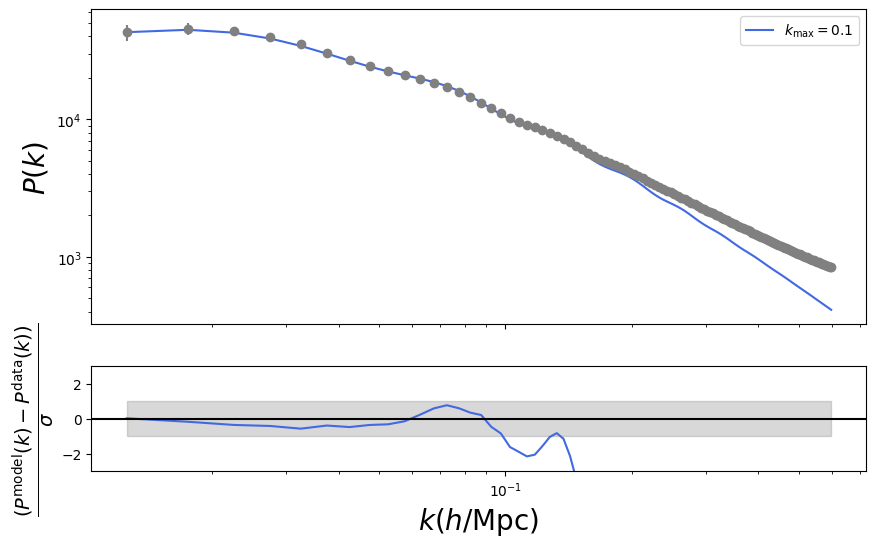

In [23]:
fig, ax = plt.subplots(2,1, figsize=(10,6),sharex=True, gridspec_kw={'height_ratios': [3, 1]})

bestfit = result.x
mono_model_lin = compute_theory(bestfit, k=k)

ax[0].errorbar(k, mono_data, err, fmt='o', color='grey')
ax[0].plot(k, mono_model_lin, label=r'$k_{\rm max}=$'+str(kmax), color='royalblue')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].legend()
ax[1].plot(k, (mono_model_lin-mono_data)/err, color='royalblue')
ax[1].fill_between(k,-np.ones(len(mono_data)),np.ones(len(mono_data)), alpha=0.3, color='grey')
ax[1].axhline(0, color='k')
ax[1].set_xscale('log')
ax[1].set_ylim(-3.,3.)
ax[1].set_xlabel(r'$k(h/$Mpc)', size=20)
ax[0].set_ylabel(r'$P(k)$', size=20)
ax[1].set_ylabel(r'$\frac{(P^{\rm model}(k)-P^{\rm data}(k))}{\sigma}$', size=20)
plt.show()

### 2.2.2) Plot the contour plot of the constrained parameters

### Answer:

### 2.2.3) Would you say the model made a good job constraining the parameters down to this $k_{\rm max}$ scale?

### Answer:

## 2.3) Do the same as in 2.2 for several values of $k_{\rm max}$ until you see that the model stops working.

I would try the $k_{\rm max}$ values {0.05,0.1,0.15,0.2,0.3}

### Answer:

### 2.3.1) At which $k_{\rm max}$ would you say the model breaks?

### Answer:

### 2.3.1) Plot the variance found in $\Omega_{\rm m}$ as a function of scale to see if including extra scales increases the accuracy of the measurements.

### Answer:

# 3) Parameter constraints with the nonlinear model

Now we will repeat problem 2) but substituting the linear model by the nonlinear one and will answer the same questions.

### Answer:

# 4) Discuss how the different models compare. Is one better behaved than the other? Is there a compelling reason to try to make models that explore smaller scales than the linear model? What if the errorbars would shrink, would the nonlinear model presented here still work?

I will leave these questions open to discuss during the school.

# 5) Extra credit: We have assumed $\beta$ to be a free parameter, but it is not. Check that all the $\beta$ values you have found are consistent with the theory prediction

### Answer:

## 5.1) If you feel like it and you have the time, substitute $\beta$ in the model function by its theory value and run new chains letting just $b$ and the cosmological parameters of your choice free. Do you recover the same results? Attention: this might take several minutes if you make it for several $k_{\rm max}$.

### Answer:

# 6) Full non-linear approach on $m_{\nu}$

Following Pellejero-Ibanez et al. (2023) we can do a full nonlinear approach to the problem thanks to $N$-body simulations. This is the so called Hybrid model of LSS. An emulator of this model is encoded in the baccoemu package that you have been using so far. In contrast of what you have done so far, here we drop the linear approximations on:


*   Structure formation
*   Velocity evolution
*   Galaxy-matter bias mapping

You can find all relevant equations and explanations in the paper but in a nutshell these are the important quantities:

The relationship between matter and galaxies, $F[\delta_{\rm L}(\pmb{q})]$, is typically referred to as the bias model. In our approach, we adopt a 2nd-order perturbative expansion for $F(\pmb{q})$ which weighs the significance of various Lagrangian fields in depicting the density of tracers at a given $\pmb{q}$:


\begin{equation}
\begin{split}
    \delta_g(\pmb{q}) \equiv F[\delta_{\rm L}(\pmb{q})] = & 1 + b_1\delta_{\rm{L}}(\pmb{q}) + b_2 \left( \delta^2_{\rm{L}}(\pmb{q})-\langle\delta^2_{\rm{L}}(\pmb{q})\rangle \right) \\ & + b_s \left( s^2(\pmb{q}) - \langle s^2(\pmb{q})\rangle \right) + b_{\nabla^2} \nabla^2 \delta_{\rm{L}}(\pmb{q}) \; .
\end{split}
\end{equation}


Here, brackets $\langle\cdot\rangle$ denote volume averages, and $s^2 \equiv s_{ij}s^{ij}$ where $s_{ij}$ is the traceless tidal tensor. Thus, $s^2 = \partial_i\partial_j\phi(\pmb{q}) - 1/3\delta^{\rm{K}}_{ij}\delta_{\rm{L}}(\pmb{q})^2$, with $\phi(\pmb{q})$ representing the linear gravitational potential.


Therefore, the overdensity field of galaxies in Eulerian space,  $ \delta_{\rm g}(\pmb{x})$, reads:


\begin{equation}
\begin{split}
   1+ \delta_{\rm g}(\pmb{x}) = \int {\rm d}^3q \, F[\delta_{\rm L}(\pmb{q})] \, \delta_{\rm D}(\pmb{x}-\pmb{q}-\pmb{\psi}(\pmb{q})),
\end{split}
\end{equation}


where $\delta_{\rm D}$ is a Dirac's delta. We highlight that our implementation of the hybrid bias expansion has undergone extensive testing.


To compute the galaxy overdensity in redshift space, $ \delta_{\rm g}^z$, we include an additional term in the displacement field to account for the effect of peculiar velocities:


\begin{equation}
\begin{split}
   \pmb{\psi}(\pmb{q}) \rightarrow \pmb{\psi}(\pmb{q}) + \frac{\hat{\pmb{x}}_z(\pmb{q}) \cdot \pmb{v}[\pmb{x}(\pmb{q})]}{aH} \, \hat{\pmb{x}}_z(\pmb{q}),
\end{split}
\end{equation}


where $\hat{\pmb{x}}_z({\pmb{q}})$ represents the unit vector along the line-of-sight, $a$ denotes the scale factor, and $H$ is the Hubble parameter. The velocity field $\pmb{v}$ is built directly from the peculiar velocities measured for haloes and matter in $N$-body simulations. Thus, our model inherits in full the nonlinearity of velocities and of the mapping between real-, $\pmb{x}$, and redshift-space coordinates, $\pmb{s}$.


We note that we cannot simply use $v(\pmb{x})$ as the velocity of matter in simulations because we expect galaxies to sample a coarsed-grained version of the velocity field. For instance, central galaxies will be mostly at rest relative to their host halo, whereas satellite galaxies could display larger or smaller velocity dispersion than typical particles in a halo, owing to the details of galaxy formation physics \citep{Orsi_2018,Alam_2021}. Therefore, we define $\pmb{v}(\pmb{x}) = \pmb{v}_{\rm matter}(\pmb{x})$ if $\pmb{x}$ is outside a halo and $\pmb{v}(\pmb{x}) = \pmb{v}_{\rm{halo}}(\pmb{x})$ if $\pmb{x}$ is found within a halo. To model the role of intra-halo satellite velocities, we include two additional free parameters that describe the fraction of satellite galaxies, $f_{\rm sat}$, and their typical velocity dispersion $\lambda_{\rm sat}$:


\begin{equation}
    \delta_{\rm g}^s(\pmb{s}) \rightarrow  \delta_{\rm g}^s(\pmb{s}) \boldsymbol{\ast}_z \left[ (1-f_{\rm sat})\, \delta_{\rm{D}}(s_z) +f_{\rm sat} \,\exp \left( {-\lambda_{\rm sat} s_z} \right) \right].
\end{equation}


where $\boldsymbol{\ast}_z$ denotes a convolution along the line-of-sight direction.


Although the model provides predictions at the field level  \citep{PellejeroIbanez_2024}, in this paper we are only interested in the redshift-space power spectrum which is typically characterised by a multipole expansion:


\begin{equation}
P_{\ell}(k) = \frac{2\ell+1}{2}\int_{-1}^{1}d\mu\,\mathcal{P}_\ell(\mu)\ \langle | \delta_{\rm g}^s(k,\mu)|^2) \rangle,
\end{equation}


\noindent where $k\equiv |\pmb{k}|$, $\mu \equiv \pmb{k} \cdot \pmb{k_z}$, and $\mathcal{P}_\ell(\mu)$ are Legendre  polynomials.


Finally, we include two stochastic terms in the power spectrum monopole, $\ell=0$, to account for discreteness noise and small-scale physics not included in our bias model: $\epsilon(k) = 1 /\bar{n} \, (\epsilon_1+\epsilon_2k^2)$, where $\bar{n}$ is the mean number density of galaxies in the sample.






## 6.1) Preparing the basics

Now we are going to just plot the basic data and make a call to the model to check that everything works as expected. Note that we are going to use the multipoles of the power spectrum $P_\ell(k)$ where $\ell=\{0,2,4\}$ instead of simply $\ell=0$ as we have done until now.

First the data.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


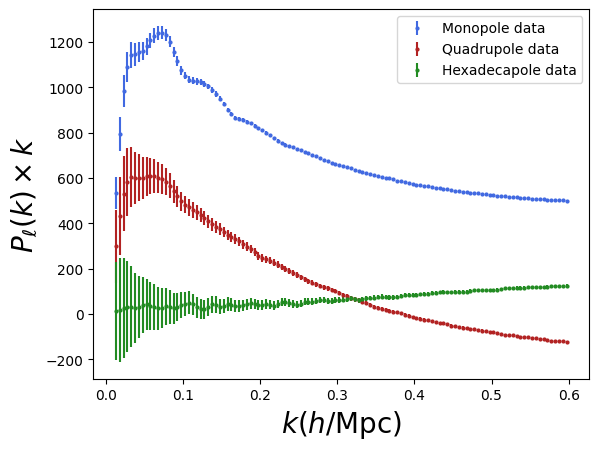

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

data = np.loadtxt('/content/drive/MyDrive/WinterSchoolIAC/data_winterschool.txt').T
k = data[0]
mono_data = data[1]
mono_err = data[2]
quad_data = data[3]
quad_err = data[4]
hexa_data = data[5]
hexa_err = data[6]

plt.errorbar(k, k*mono_data, k*mono_err, fmt='o', ms=2, color='royalblue', label=r'Monopole data')
plt.errorbar(k, k*quad_data, k*quad_err, fmt='o', ms=2, color='firebrick', label=r'Quadrupole data')
plt.errorbar(k, k*hexa_data, k*hexa_err, fmt='o', ms=2, color='forestgreen', label=r'Hexadecapole data')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$k(h/$Mpc)', size=20)
plt.ylabel(r'$P_\ell(k)\times k$', size=20)
plt.legend()
plt.show()

Now the theory.

In [ ]:
import baccoemu as baccoemu
lbias = baccoemu.Lbias_expansion_RSD(verbose=False)

Loading l-bias lpt emulator...


100% (34263040 of 34263040) |############| Elapsed Time: 0:00:04 Time:  0:00:04
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a la

L-bias lpt emulator loaded in memory.
Loading l-bias smeared BAO emulator...


100% (1576960 of 1576960) |##############| Elapsed Time: 0:00:01 Time:  0:00:01


L-bias lpt emulator loaded in memory.
Loading non-linear l-bias emulator...


100% (50360320 of 50360320) |############| Elapsed Time: 0:00:05 Time:  0:00:05
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Nonlinear l-bias emulator loaded in memory.


100% (358400 of 358400) |################| Elapsed Time: 0:00:00 Time:  0:00:00


100% (2293760 of 2293760) |##############| Elapsed Time: 0:00:01 Time:  0:00:01


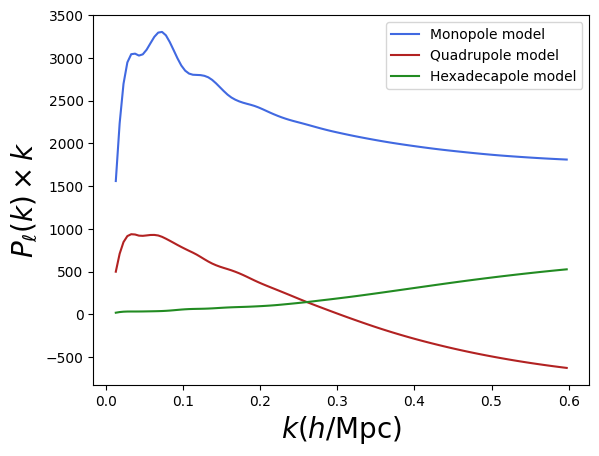

In [ ]:
import numpy as np

pars = {
    'omega_cold' : 0.307,
    'omega_baryon' : 0.05,
    'hubble' : 0.67,
    'ns' : 0.96,
    'sigma8_cold' : 0.83,
    'neutrino_mass' : 0.06,
    'w0' : -1,
    'wa' : 0,
    'expfactor' : 1
}

b1, b2,bt,blap,lambda_FoG,f_sat,eps1, eps2 = 1.,0,0,0,0.3,0.3,0,0
bias_pars = [b1, b2, bt, blap]
muacc = np.linspace(0., 1., 100)

kmodel, mono_model, quad_model, hexa_model = lbias.get_galaxy_pk(bias=bias_pars, lambda_FoG=lambda_FoG, f_sat=f_sat,
                                        epsilon_1=eps1, epsilon_2=eps2,
                                        mean_num_dens=1e-3, k=k, mu=muacc, **pars)

plt.plot(kmodel, kmodel*mono_model, ms=2, color='royalblue', label=r'Monopole model')
plt.plot(kmodel, kmodel*quad_model, ms=2, color='firebrick', label=r'Quadrupole model')
plt.plot(kmodel, kmodel*hexa_model, ms=2, color='forestgreen', label=r'Hexadecapole model')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$k(h/$Mpc)', size=20)
plt.ylabel(r'$P_\ell(k)\times k$', size=20)
plt.legend()
plt.show()

## 6.2) Compute constraints on $m_\nu$

To do this we first need to write the $\chi^2$ computation for our new data/model

### Answer:

How well does it work?

On a first try with some random numbers it doesn't look as if it's doing a very bad job on large scales. Although it deviates on smaller scales. But now we have way more free parameters, and not only that, but the evaluation of the model is way slower. Running these chains would be unfeasable in this google collab, one would need a bigger cluster. But there is no way for us to know the correct bias parameters so we need to do a *dirty trick*.

**Dirty Trick**

We are going to assume that the data is given by a sample of the model. In this way, two things happen, 1) the model is perfect and 2) we know the correct values of the bias parameters.

In [ ]:
mono_data, quad_data, hexa_data = mono_model, quad_model, hexa_model

Now we define the likelihood so that we can do a constrain over just two of the parameters.

### Answer:

And we can run an MCMC only for these two parameters $\{\Omega_{\rm cold},m_\nu\}$. This will take about an hour :(

### Answer:

You should end up with something like this:

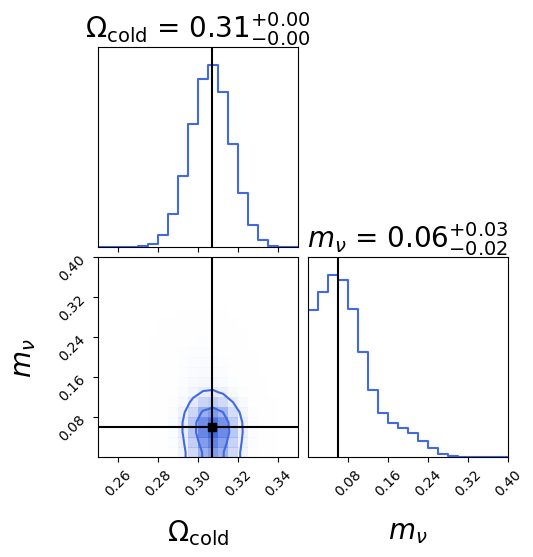

In [ ]:
import corner

labels = [r'$\Omega_{\rm cold}$', r'$m_\nu$']
truths=[0.307,0.06]

figure = corner.corner(
            result.flat_samples, labels=labels, title_kwargs={"fontsize": 20},
            label_kwargs={"fontsize": 20}, smooth=2, smooth1d=2,
            range=bounds,truths=truths, color='royalblue',
            levels=(0.39,0.68), plot_datapoints=False, truth_color='k', show_titles=True
        )

**I hope you enjoyed the notebook!!**